In [2]:
#standard libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from tqdm import tqdm

#toroidal filament functions
from process_probe_data import retreive_plasma_current, retreive_magnetic_signal,trim_quantities
from toroidalFilament.plasma_shift import toroidal_filament_shift_progression

# Toroidal Filament Model

## Retreive plasma current and probes' magnetic signals

In [9]:
#retreive processed data
recorded_plasma_current, recorded_time, discharge_begin, discharge_end = retreive_plasma_current(966)
recorded_magnetic_signal = retreive_magnetic_signal(966)

time, plasma_current, plasma_signal = trim_quantities(recorded_time,recorded_magnetic_signal,recorded_plasma_current,discharge_begin,discharge_end)

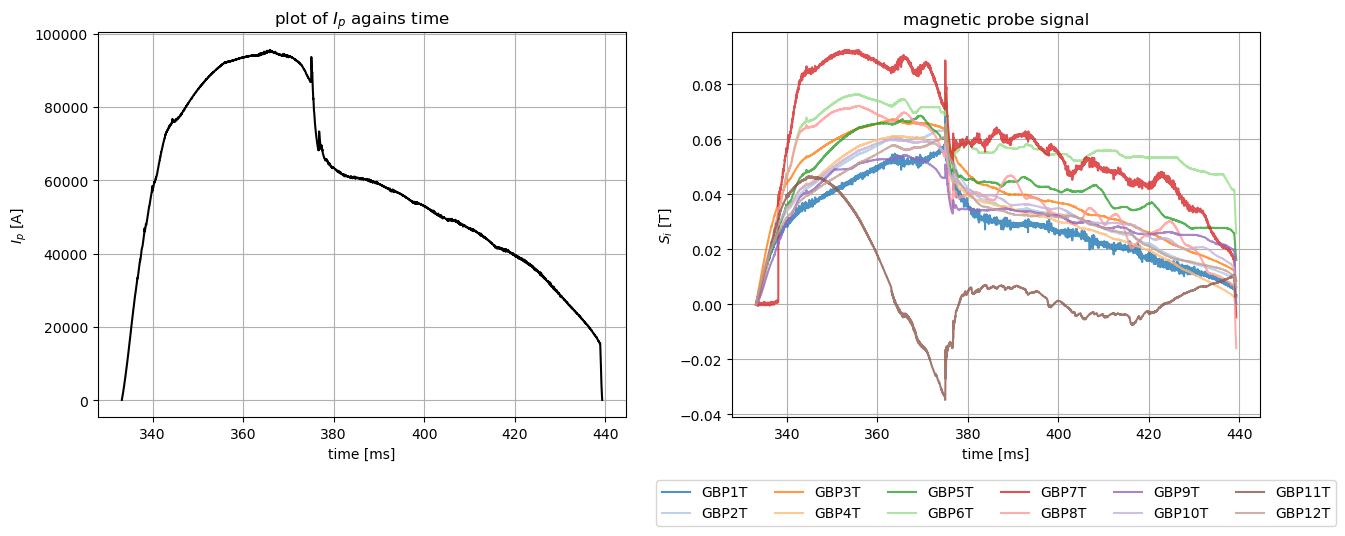

In [10]:
column_names = plasma_signal.columns[1:]


fig, (ax0,ax2) = plt.subplots(1,2, figsize = (15,5))
ax0.plot(time, plasma_current,color = "black")
ax0.set_xlabel("time [ms]")
ax0.set_ylabel("$I_p$ [A]")
ax0.grid()
ax0.set_title("plot of $I_p$ agains time")

cmap = plt.get_cmap("tab20")  # A colormap with 10 distinct colors

for i, name in enumerate(column_names):
    ax2.plot(time, plasma_signal[name], label=name, color=cmap(i),alpha = 0.8)
ax2.set_xlabel("time [ms]")
ax2.set_ylabel("$S_i$ [T]")
ax2.grid()
ax2.set_title("magnetic probe signal")
ax2.legend(loc = "lower center", bbox_to_anchor = (0.5,-0.3), ncol = 6)
plt.show()

## Calculate plasma shift

In [ ]:
use_probes = [[1,4,7,10],[12,3,6,9],[2,5,8,11],[12,2,6,8]]
valid_time, R0_arr, R0_err, Z0_arr, Z0_err = toroidal_filament_shift_progression(time,plasma_signal,use_probes)

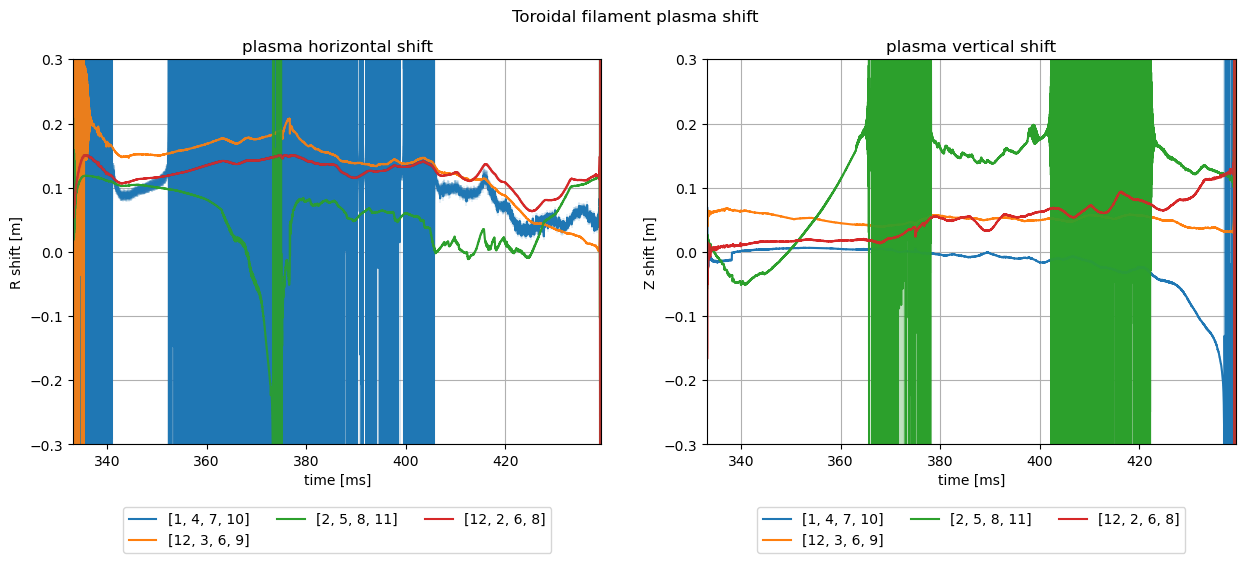

In [13]:
fig, ax = plt.subplots(1,2,figsize = (15,5))

fig.suptitle("Toroidal filament plasma shift")

for t, R_shift,R_err, probe_arr in zip(valid_time,R0_arr,R0_err,use_probes):
    line = ax[0].plot(t,R_shift,label = f"{probe_arr}")
    color = line[0].get_color()
    ax[0].errorbar(t, R_shift, yerr=R_err, alpha=0.1,color = color)

ax[0].set_xlim(discharge_begin,discharge_end)
ax[0].set_ylim(-0.3,0.3)
ax[0].grid()
ax[0].set_xlabel("time [ms]")
ax[0].set_ylabel("R shift [m]")
ax[0].set_title("plasma horizontal shift")
ax[0].legend(loc = "lower center", bbox_to_anchor = (0.5,-0.3),ncol = 3)


for t, Z_shift, Z_err,probe_arr in zip(valid_time, Z0_arr,Z0_err,use_probes):
    line = ax[1].plot(t,Z_shift,label = f"{probe_arr}")
    color = line[0].get_color()
    ax[1].errorbar(t, Z_shift,yerr = Z_err,alpha = 0.1,color = color)
ax[1].set_xlim(discharge_begin,discharge_end)
ax[1].set_ylim(-0.3,0.3)
ax[1].grid()
ax[1].set_xlabel("time [ms]")
ax[1].set_ylabel("Z shift [m]")
ax[1].set_title("plasma vertical shift")
ax[1].legend(loc = "lower center", bbox_to_anchor = (0.5,-0.3),ncol = 3)
plt.show()